<a href="https://colab.research.google.com/github/arpit7714/linearregression/blob/master/new2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True) # y labels are oh-encoded

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [4]:
m_train=mnist.train.num_examples
m_test=mnist.test.num_examples
m_validation=mnist.validation.num_examples
print(m_train,m_test,m_validation)

55000 10000 5000


In [0]:
#global variables
n_input=784
n_hidden1=512
n_hidden2=256
n_hidden3=128
n_hidden4=64
n_output=10

In [0]:
#hyperparameters reamins constant during the process of training
learning_rate=1e-4
epoch=1000
batch_size=64
dropout=0.5

In [0]:
#truncated_normal values are basically intialized value of the weight
#these values are close to zero and are rondom 
weights = {
    'w1':tf.Variable(tf.truncated_normal([n_input,n_hidden1],stddev=0.1)),
    'w2':tf.Variable(tf.truncated_normal([n_hidden1,n_hidden2],stddev=0.1)),
    'w3':tf.Variable(tf.truncated_normal([n_hidden2,n_hidden3],stddev=0.1)),
    'w4':tf.Variable(tf.truncated_normal([n_hidden3,n_hidden4],stddev=0.1)),
    'w5':tf.Variable(tf.truncated_normal([n_hidden4 , n_output ],stddev=0.1))
    
    
}             

In [8]:
print(weights['w1'])

<tf.Variable 'Variable:0' shape=(784, 512) dtype=float32_ref>


In [0]:
biases={
    'b1':tf.Variable(tf.constant(0.1,shape=[n_hidden1])),
    'b2':tf.Variable(tf.constant(0.1,shape=[n_hidden2])),
    'b3':tf.Variable(tf.constant(0.1,shape=[n_hidden3])),
    'b4':tf.Variable(tf.constant(0.1,shape=[n_hidden4])),
    'b5':tf.Variable(tf.constant(0.1,shape=[n_output]))
    
}

In [10]:
print(biases['b1'])

<tf.Variable 'Variable_5:0' shape=(512,) dtype=float32_ref>


In [0]:
X=tf.placeholder("float",[None,n_input])
keep_prob = tf.placeholder(tf.float32) 
Y=tf.placeholder("float",[None,n_output])

In [0]:

#neural network
layer_1=tf.add(tf.matmul(X,weights['w1']),biases['b1'])
out_1=tf.nn.relu(layer_1)
layer_2=tf.add(tf.matmul(out_1,weights['w2']),biases['b2'])
out_2=tf.nn.relu(layer_2)
layer_3=tf.add(tf.matmul(out_2,weights['w3']),biases['b3'])
out_3=tf.nn.relu(layer_3)
layer_4=tf.add(tf.matmul(out_3,weights['w4']),biases['b4'])
layer_drop = tf.nn.dropout(layer_4, keep_prob)
out_4=tf.nn.relu(layer_4)
layer_5=tf.add(tf.matmul(out_4,weights['w5']),biases['b5'])


In [13]:
#cross entropy of log-loss function to optimize the cost
cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=Y,logits=layer_5))
train_step=tf.train.AdamOptimizer(learning_rate).minimize(cost)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [0]:

#correct prediction
prediction=tf.equal(tf.argmax(layer_5,1),tf.argmax(Y,1))
#accuracy how many it is telling correctly
accuracy = tf.reduce_mean(tf.cast(prediction,tf.float32))

In [0]:
init=tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

iteration 0 	 LOSS= 2.5697024 	Accuracy = 0.09375
iteration 100 	 LOSS= 0.9656617 	Accuracy = 0.84375
iteration 200 	 LOSS= 0.55548835 	Accuracy = 0.84375
iteration 300 	 LOSS= 0.47757015 	Accuracy = 0.859375
iteration 400 	 LOSS= 0.24856506 	Accuracy = 0.9375
iteration 500 	 LOSS= 0.14344001 	Accuracy = 0.984375
iteration 600 	 LOSS= 0.26642466 	Accuracy = 0.953125
iteration 700 	 LOSS= 0.19686256 	Accuracy = 0.9375
iteration 800 	 LOSS= 0.12766865 	Accuracy = 0.96875
iteration 900 	 LOSS= 0.20301881 	Accuracy = 0.953125
iteration 1000 	 LOSS= 0.22247282 	Accuracy = 0.96875
iteration 1100 	 LOSS= 0.16548164 	Accuracy = 0.953125
iteration 1200 	 LOSS= 0.18527919 	Accuracy = 0.953125
iteration 1300 	 LOSS= 0.114650115 	Accuracy = 0.96875
iteration 1400 	 LOSS= 0.24608588 	Accuracy = 0.921875
iteration 1500 	 LOSS= 0.20682433 	Accuracy = 0.9375
iteration 1600 	 LOSS= 0.14800224 	Accuracy = 0.953125
iteration 1700 	 LOSS= 0.16959229 	Accuracy = 0.9375
iteration 1800 	 LOSS= 0.14907995 	Ac

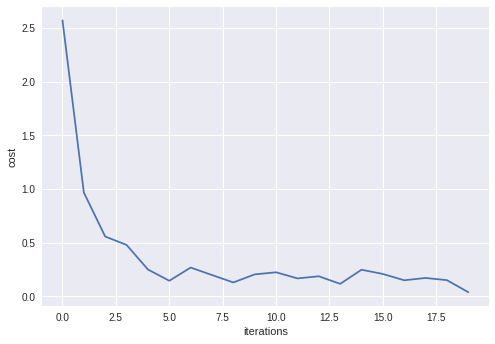

In [16]:
import matplotlib.pyplot as plt
costlist=[]
for i in range(2000):
  batch_x,batch_y=mnist.train.next_batch(batch_size)
  sess.run(train_step,feed_dict={X:batch_x,Y:batch_y,keep_prob:dropout})
  if i%100==0:
    minibatch_loss,minbatch_accuracy=sess.run([cost,accuracy],feed_dict={X:batch_x,Y:batch_y,keep_prob:1.0})
    print("iteration",str(i),"\t LOSS=",str(minibatch_loss),"\tAccuracy =",str(minbatch_accuracy))
    costlist.append(minibatch_loss)
num=[]
for j in range(20):
  num.append(j)
plt.plot(num,costlist)
plt.ylabel('cost')
plt.xlabel('iterations')
plt.show()

In [0]:
import numpy as np 
#prediction1 = sess.runtf.argmax(layer_5,1), feed_dict={X: img})
predict=tf.equal(tf.argmax(layer_5,1),tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(predict,tf.float32))


In [18]:
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
#img = np.invert(Image.open("img_20181230_153400__5r8Db.jpg").convert('L')).ravel()
#my_image = "img_20181230_153400__5r8Db.jpg"
#fname = my_image
#image = np.array(ndimage.imread(fname, flatten=False))
#my_image = scipy.misc.imresize(image, size=(28,28)).reshape((1, 64 * 64 * 3)).T
#my_image_prediction = predict(my_image, parameters)
#plt.imshow(image)

#plt.show(img)
  #batch_x,batch_y=mnist.test.next_batch(batch_size)
img1=mnist.test.images
  #plt.imshow(img1.reshape(28,28),cmap='Greys')
  #img=np.reshape(img1,(1,784))
  #print(prediction1,end='')
  #test_pred=sess.run(accuracy)
    #accu=sess.run(accuracy,feed_dict={X:batch_x,Y:batch_y})
accu=sess.run(accuracy,feed_dict={X:img1,Y:mnist.test.labels})
    #print("number ",i,end='')
print(str(accu))

  #print(np.squeeze(prediction1),end='')

  

0.9612


#one-hot encoding images data set
mnist.train.labels[0:10]


In [0]:
#converting the one-hot encoding into the single numbers 
dataarr=np.array([data.argmax() for data in mnist.test.labels])
dataarr[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])